In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'/content/POWER_Point_Daily_20100101_20221231_025d8421N_080d2664W_LST.csv')
data

,YEAR,DOY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M,T2MDEW,TS,T2M_RANGE,QV2M,PRECTOTCORR,WS2M,WS10M_RANGE,WD2M,WS2M_RANGE
0,2010,1,0.93,0.17,7.26,22.05,18.82,23.37,8.40,13.49,3.83,5.95,7.39,243.25,6.24
1,2010,2,1.02,0.20,9.95,15.91,10.96,21.39,4.67,8.18,0.01,7.44,3.09,346.69,2.54
2,2010,3,0.84,0.16,7.33,14.69,8.51,20.40,3.27,6.90,0.48,5.20,2.48,332.62,2.00
3,2010,4,1.04,0.20,9.45,12.85,6.64,19.65,5.00,6.10,0.24,5.94,2.01,309.88,1.61
4,2010,5,0.98,0.20,9.05,12.67,8.58,19.29,3.64,6.90,0.00,6.46,2.26,314.88,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2022,361,0.70,0.13,5.99,20.23,17.94,22.16,1.87,12.63,8.82,4.82,3.41,154.69,2.87
4744,2022,362,0.97,0.20,9.39,21.96,17.52,22.73,2.38,12.27,0.01,5.28,0.70,58.12,0.62
4745,2022,363,0.88,0.17,7.76,23.26,19.98,23.56,1.68,14.34,0.24,5.59,1.73,62.94,1.45
4746,2022,364,1.02,0.20,9.08,24.47,21.51,24.21,1.76,15.81,0.15,2.93,2.91,116.94,2.33


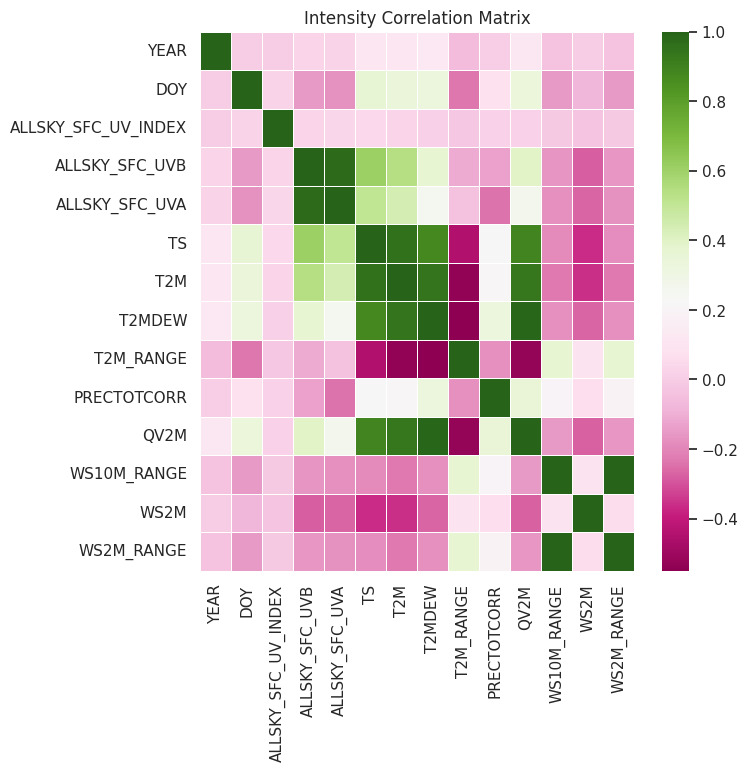

In [ ]:
# Select the columns containing intensity data
intensity_columns = ['YEAR', 'DOY','ALLSKY_SFC_UV_INDEX',	'ALLSKY_SFC_UVB','ALLSKY_SFC_UVA',
                     	'TS',	'T2M',	'T2MDEW' ,	'T2M_RANGE',	'PRECTOTCORR',	'QV2M', 'WS10M_RANGE','WS2M','WS2M_RANGE']

# Extract the relevant columns from the DataFrame
intensity_data = data[intensity_columns]

# Calculate the intensity correlation matrix
correlation_matrix = intensity_data.corr()

# Plot the intensity correlation matrix as a heatmap using Seaborn
sns.set(style='white')  # Set the style of the plot
plt.figure(figsize=(7, 7))  # Adjust the figure size if needed

sns.heatmap(correlation_matrix, cmap="PiYG", linewidths=.5)
plt.title('Intensity Correlation Matrix')
plt.show()

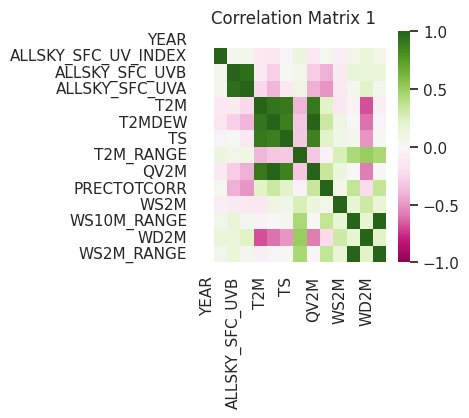

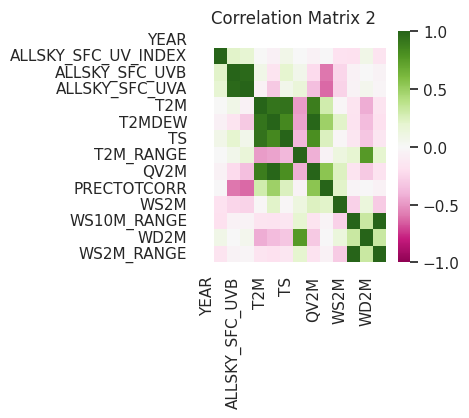

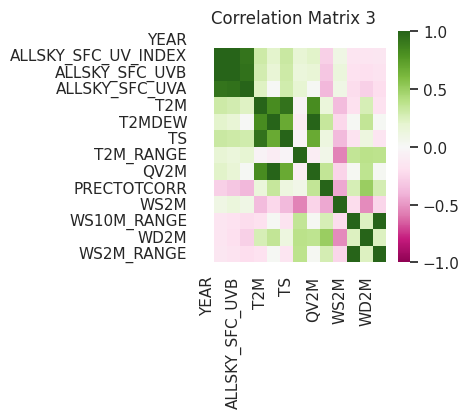

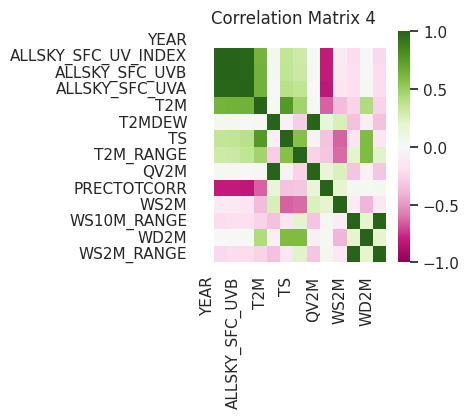

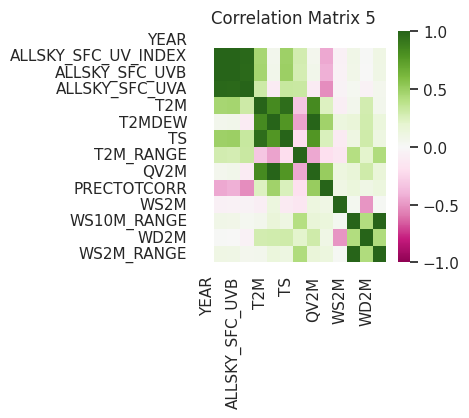

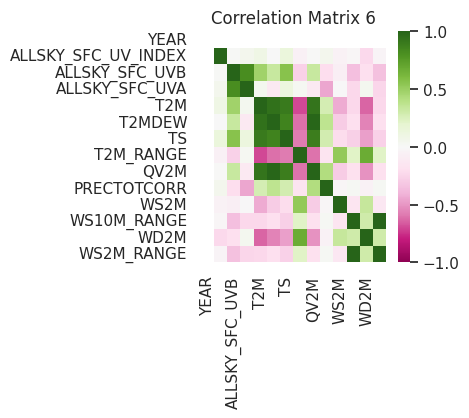

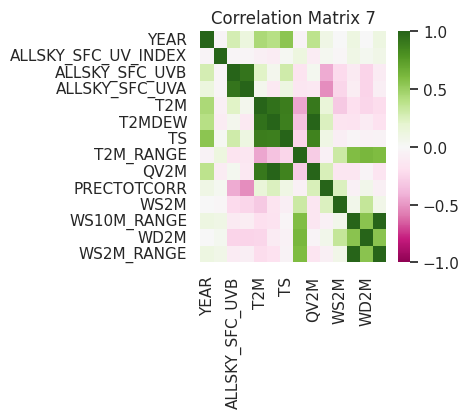

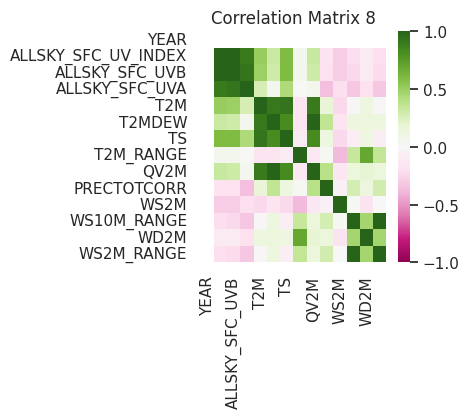

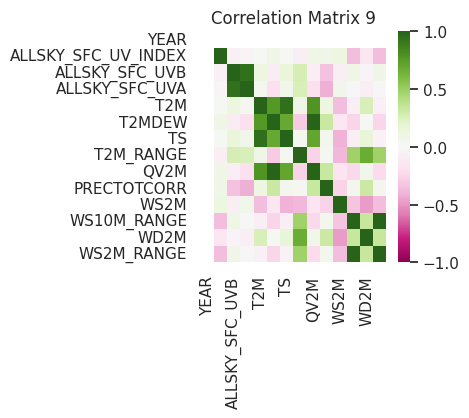

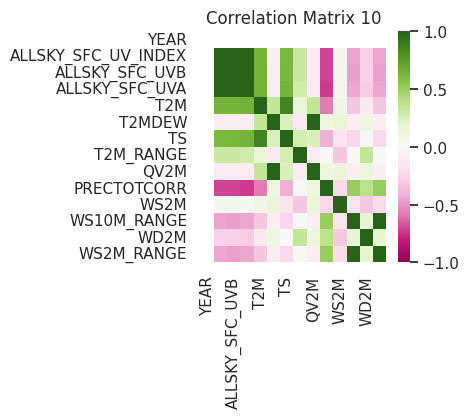

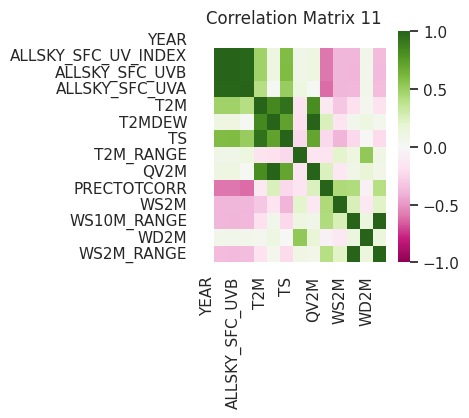

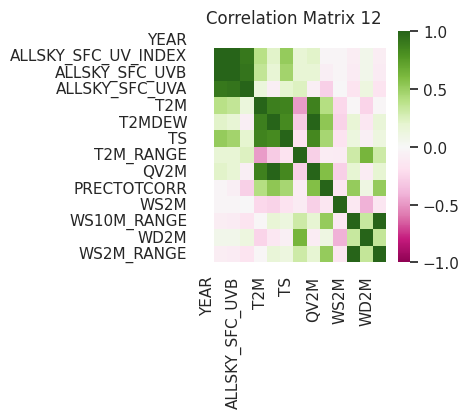

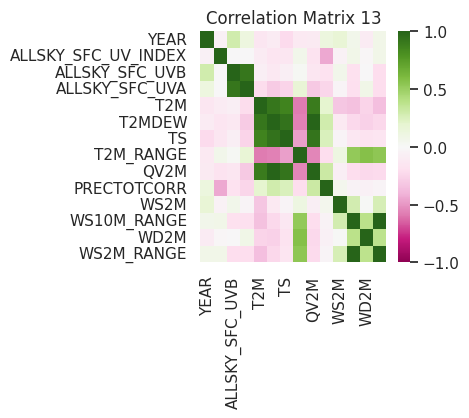

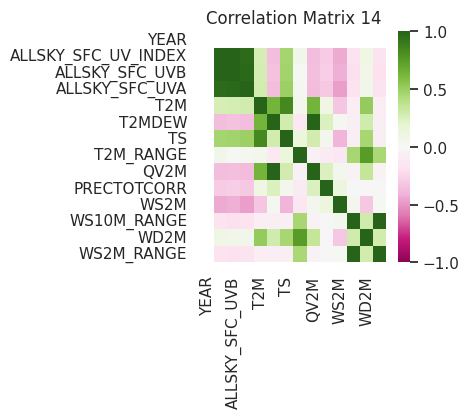

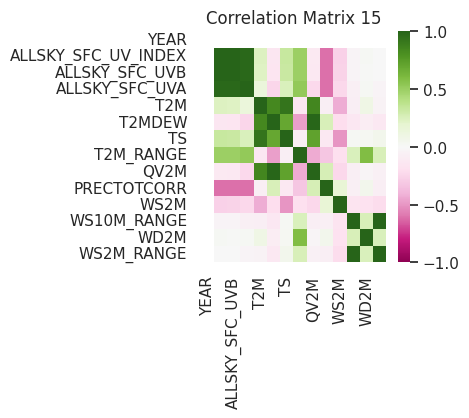

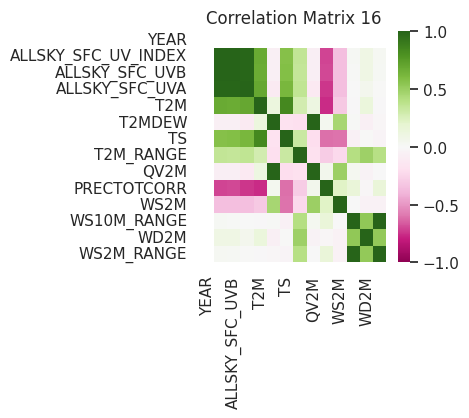

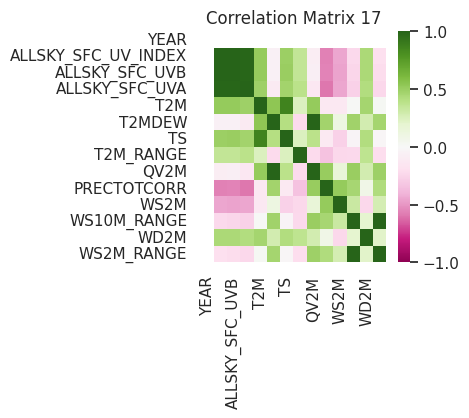

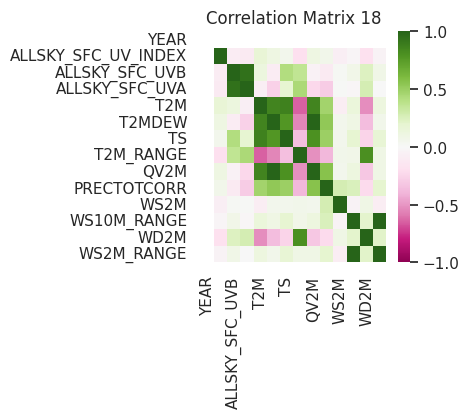

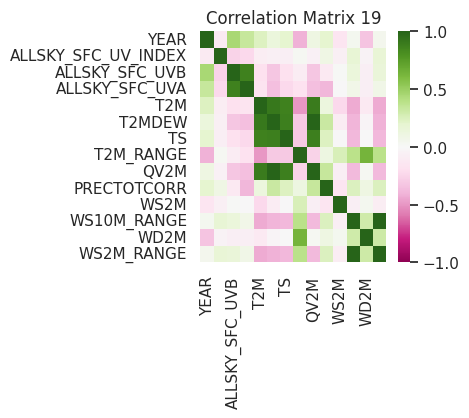

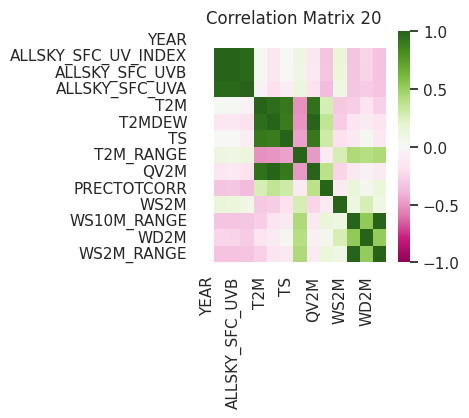

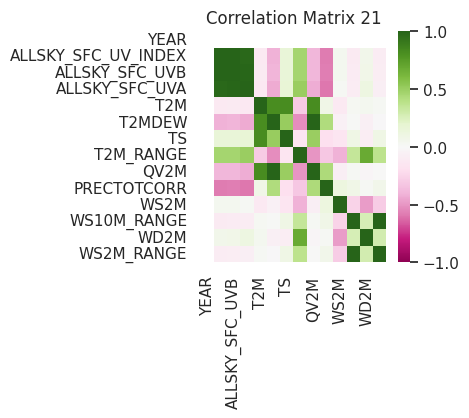

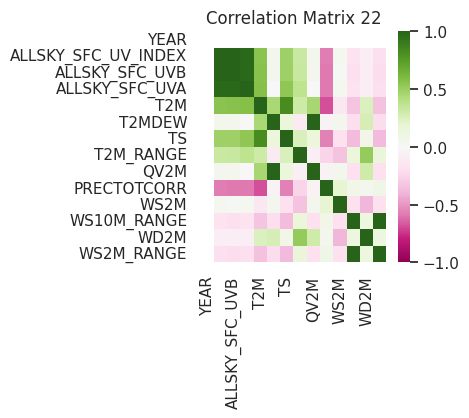

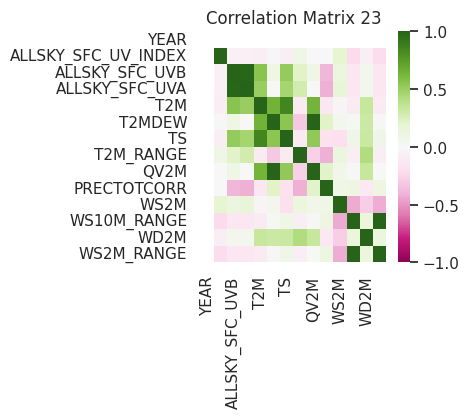

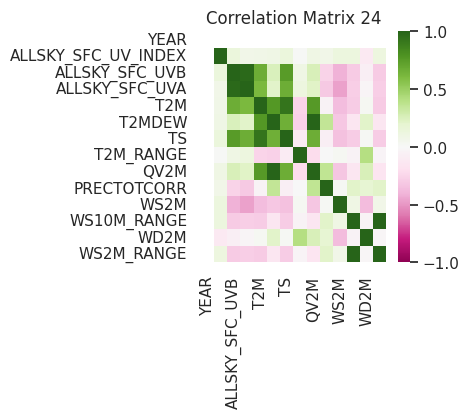

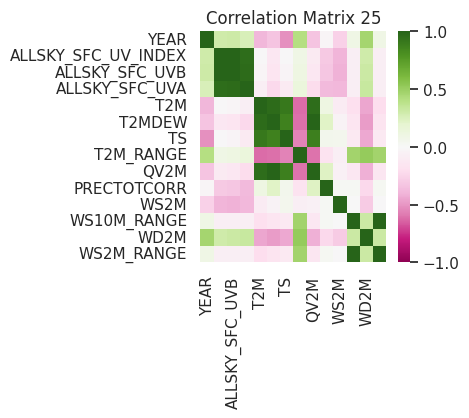

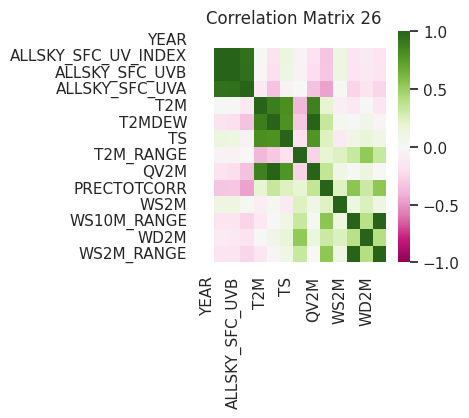

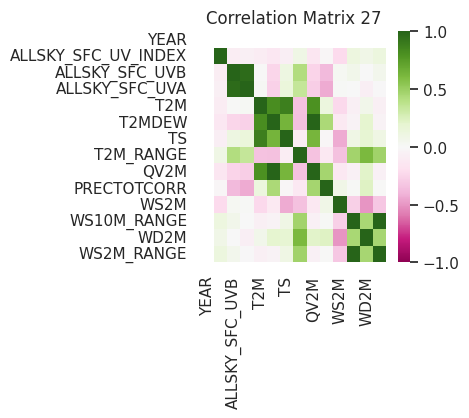

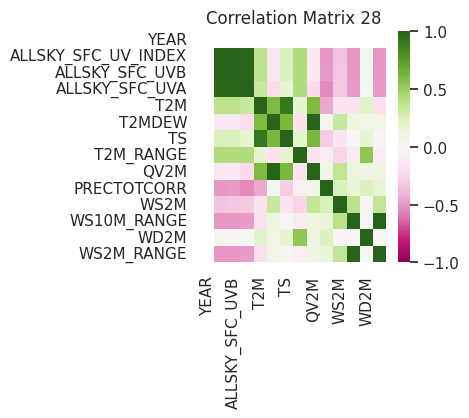

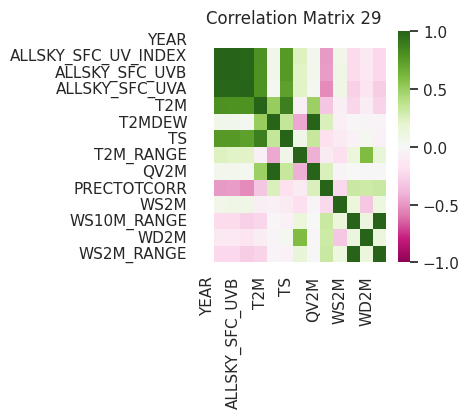

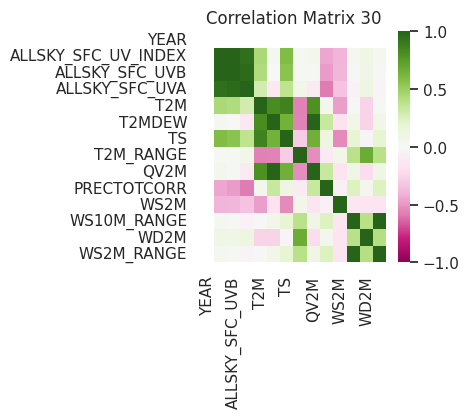

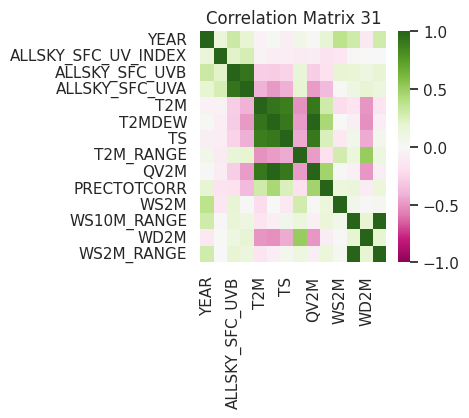

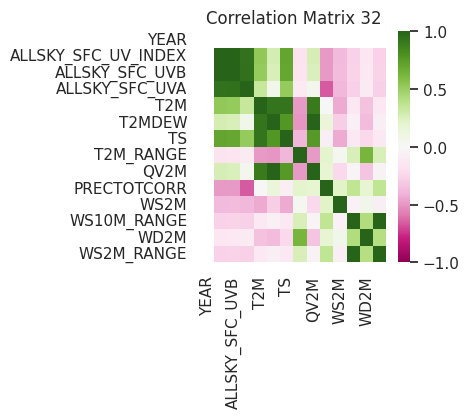

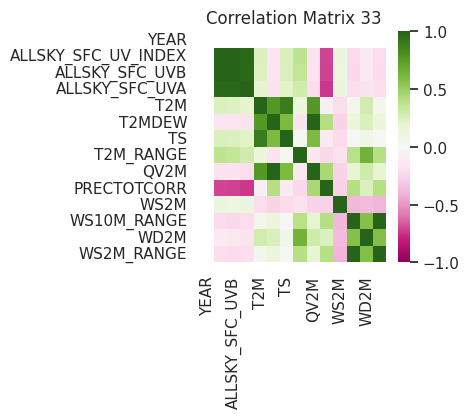

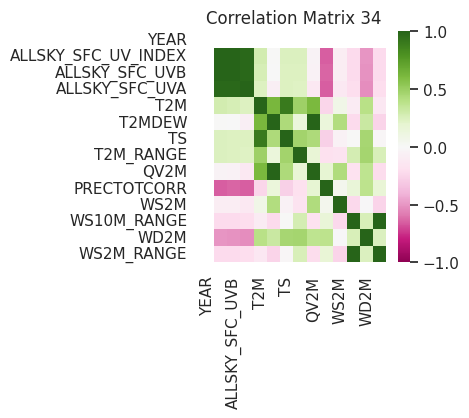

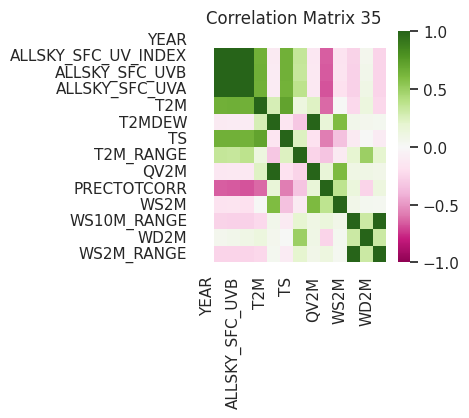

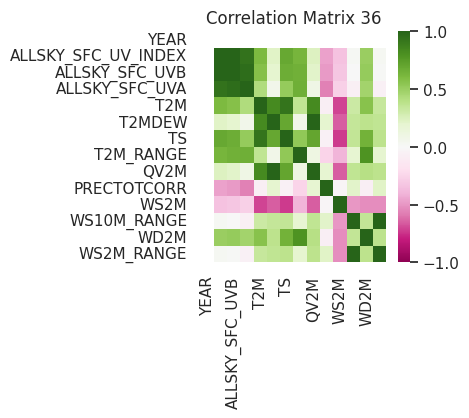

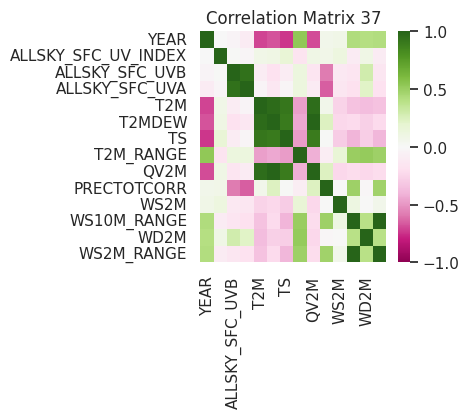

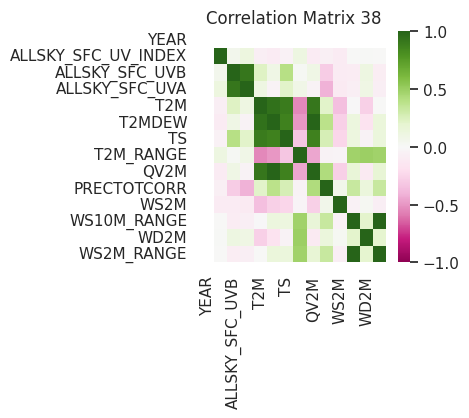

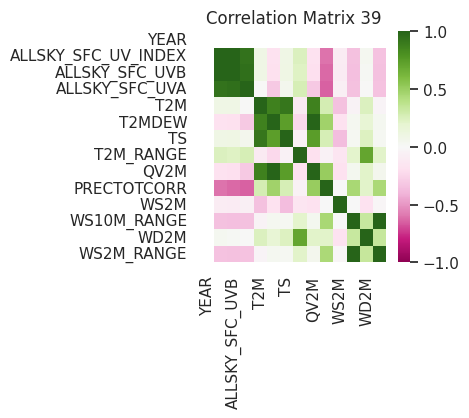

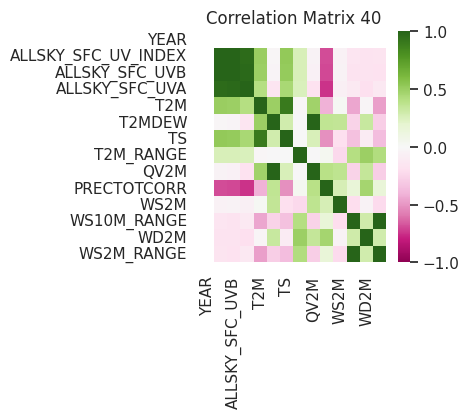

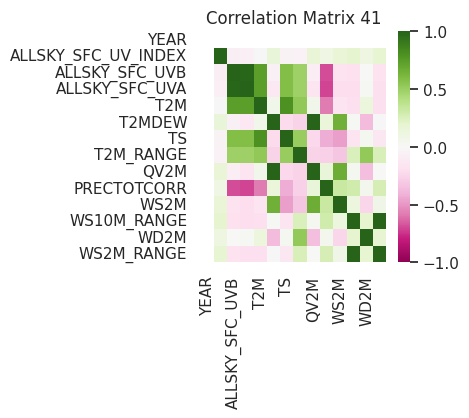

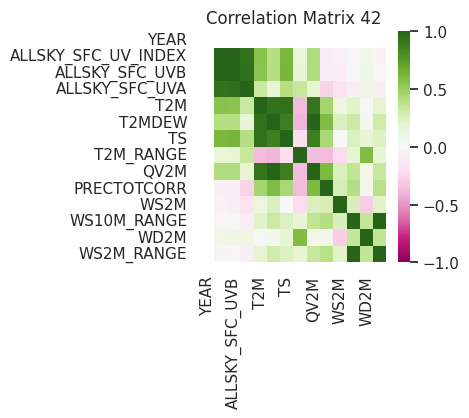

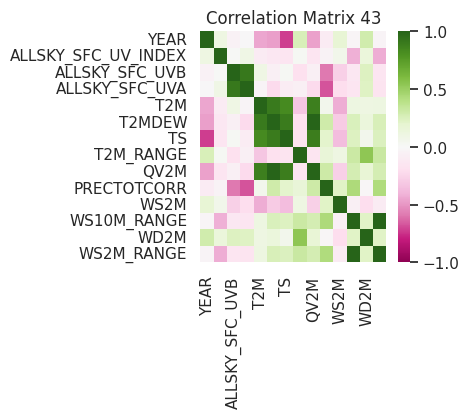

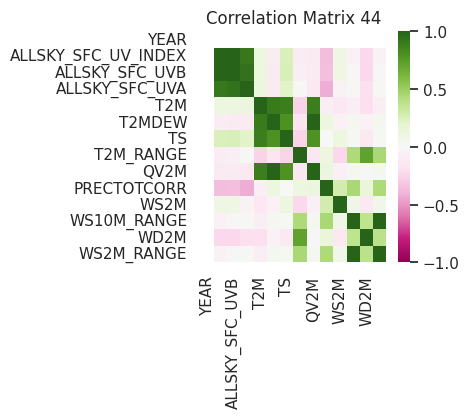

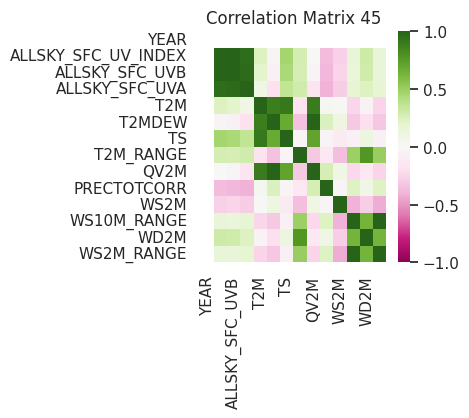

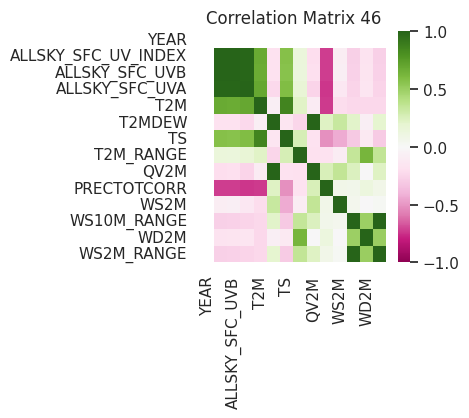

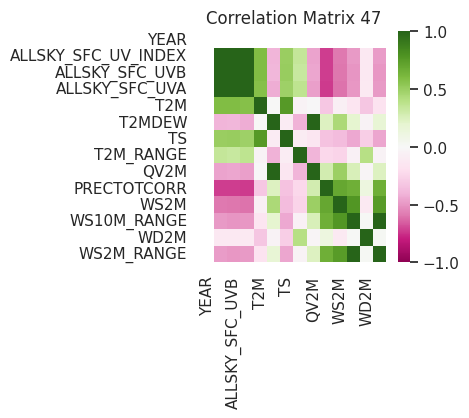

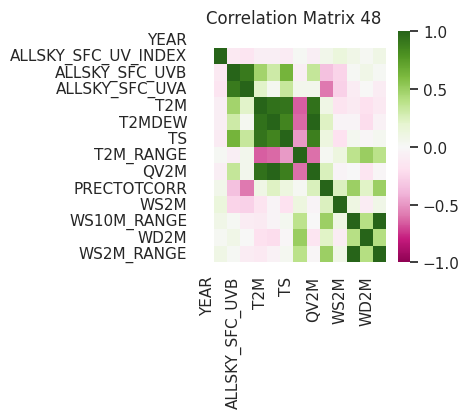

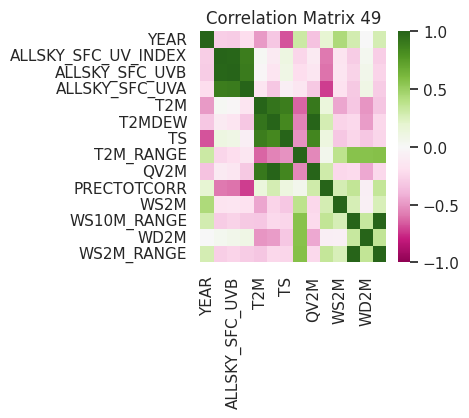

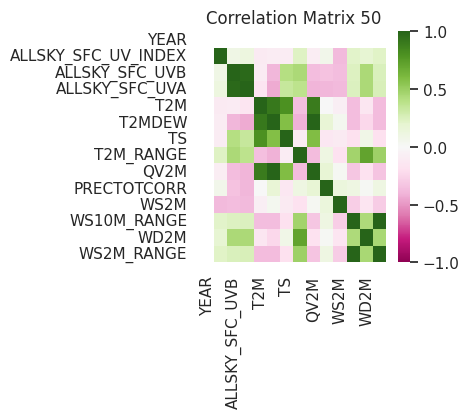

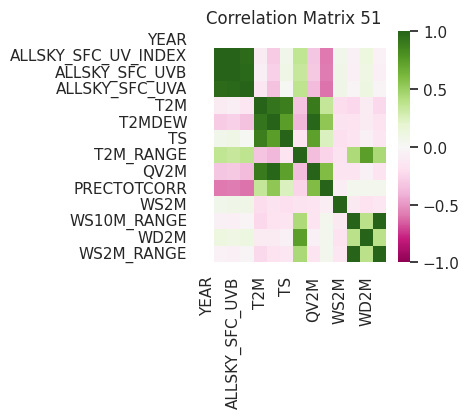

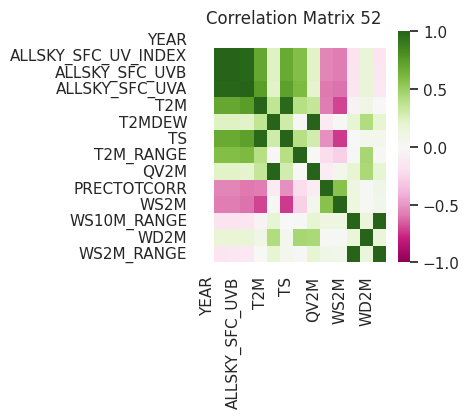

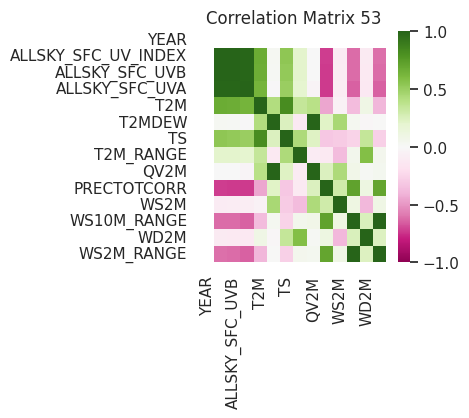

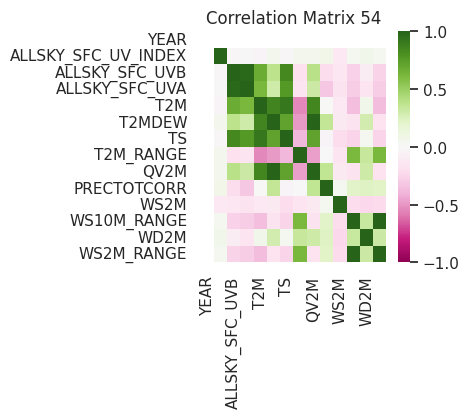

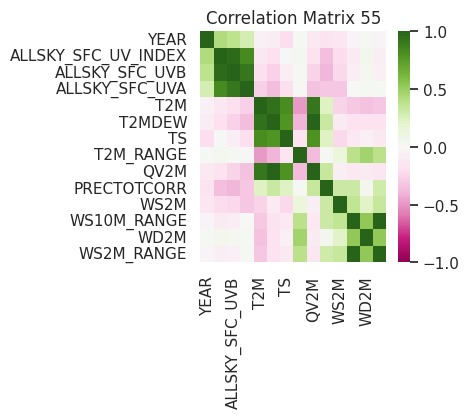

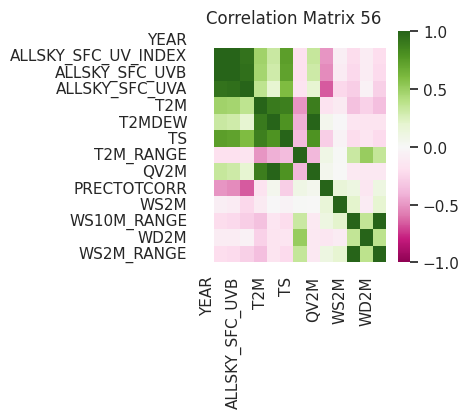

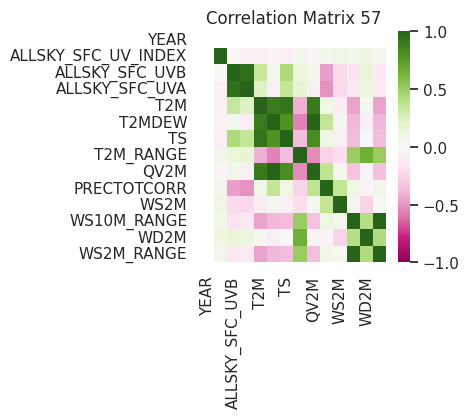

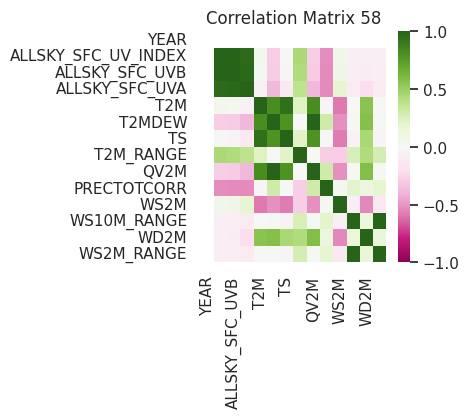

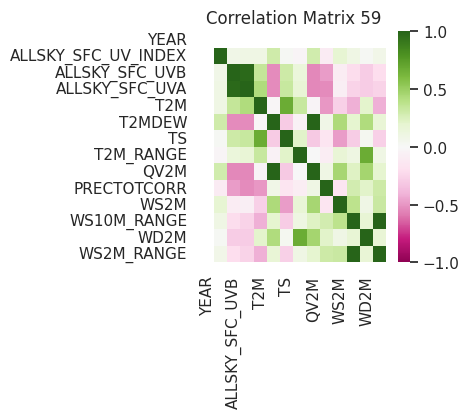

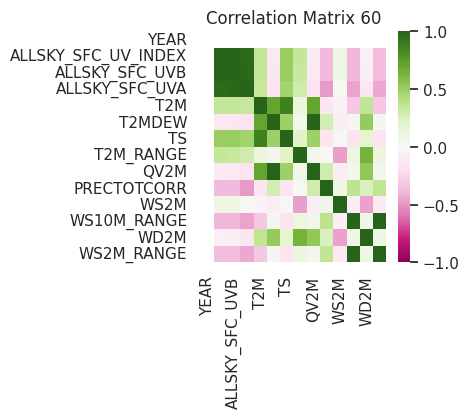

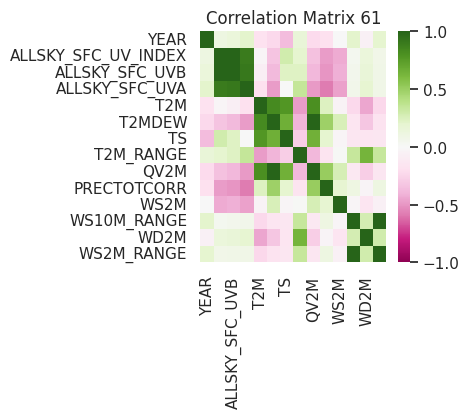

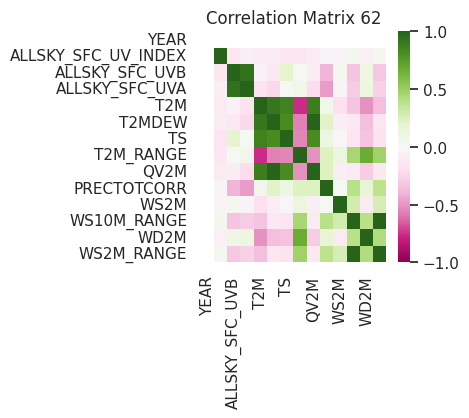

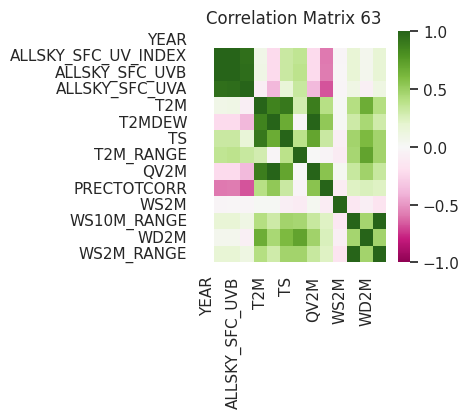

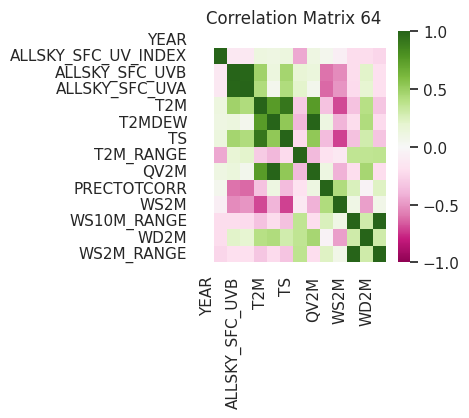

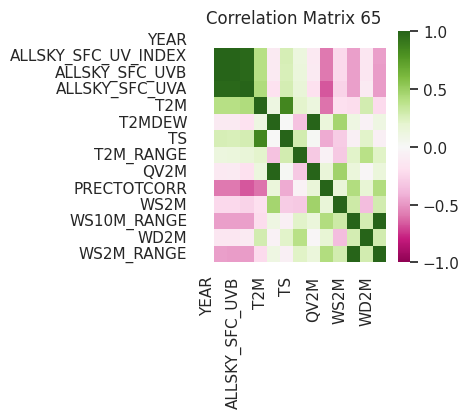

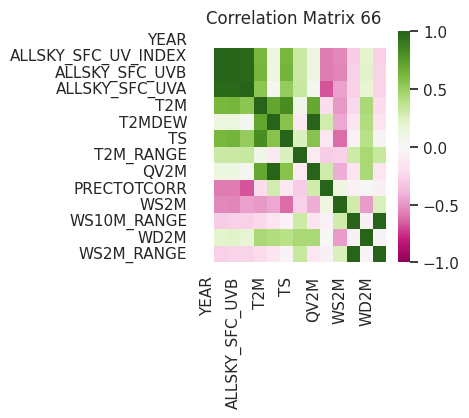

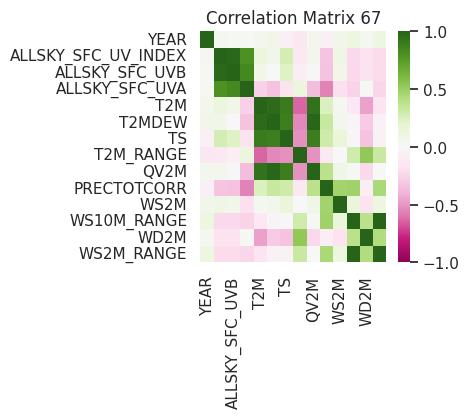

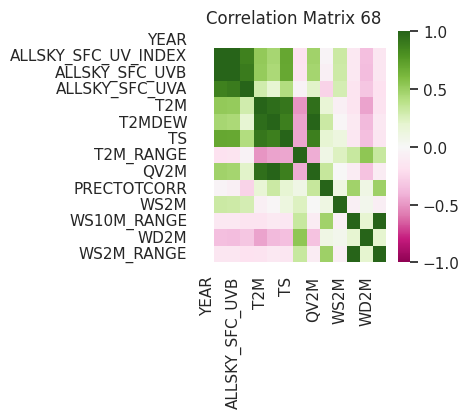

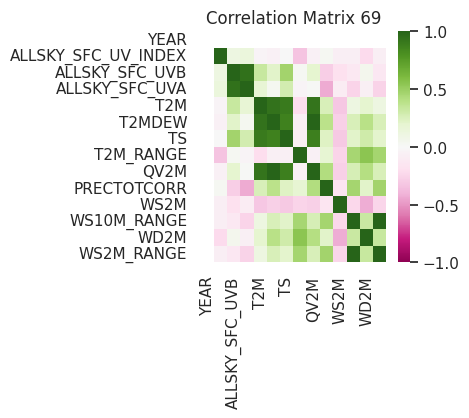

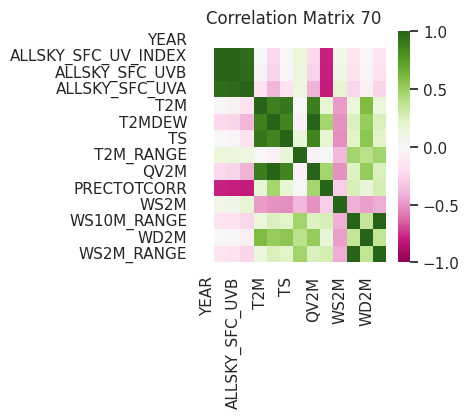

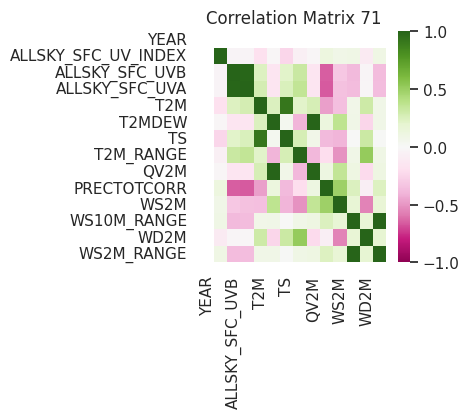

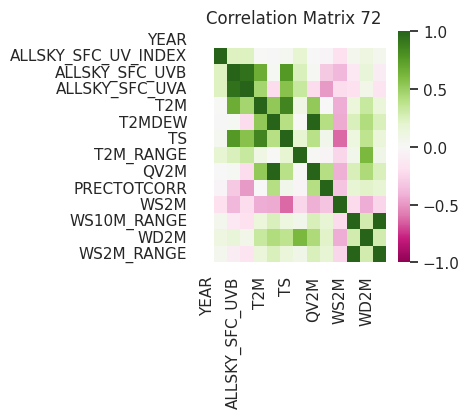

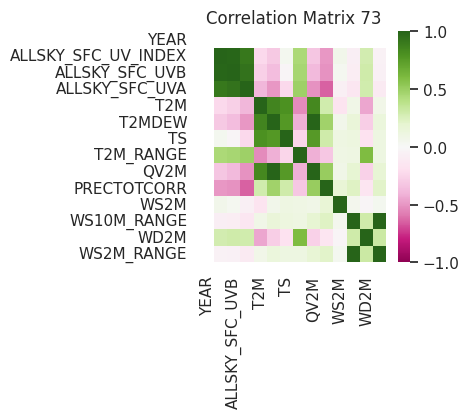

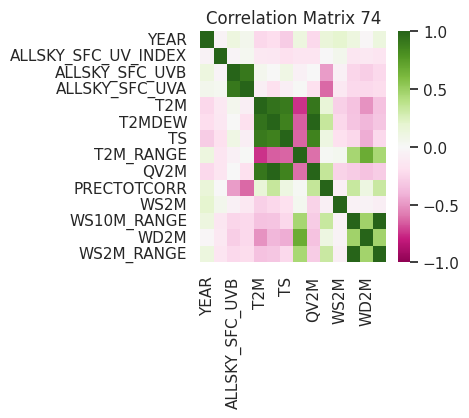

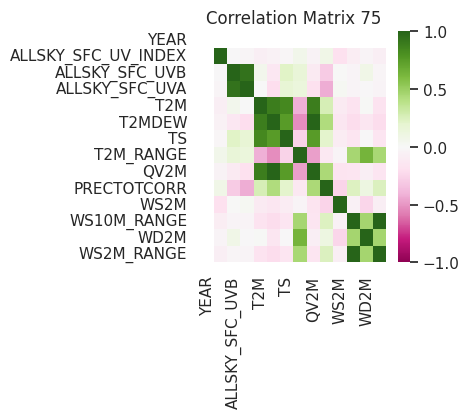

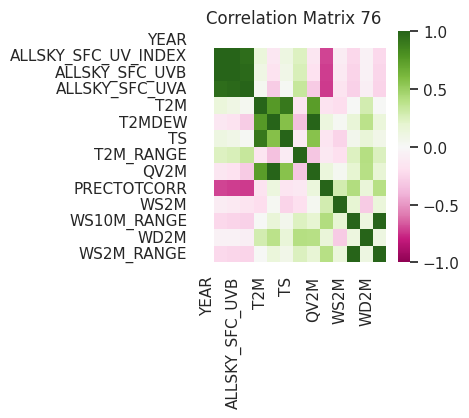

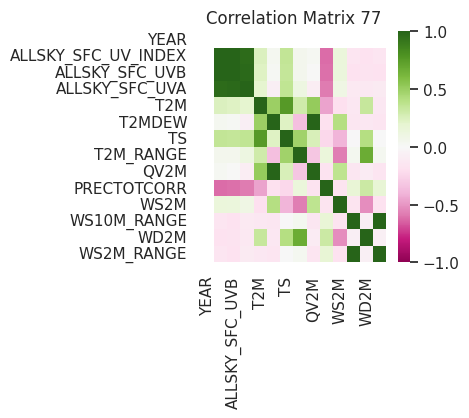

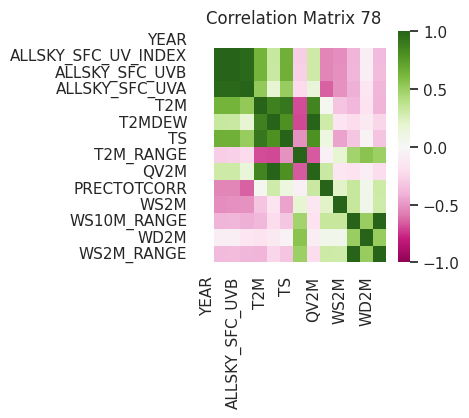

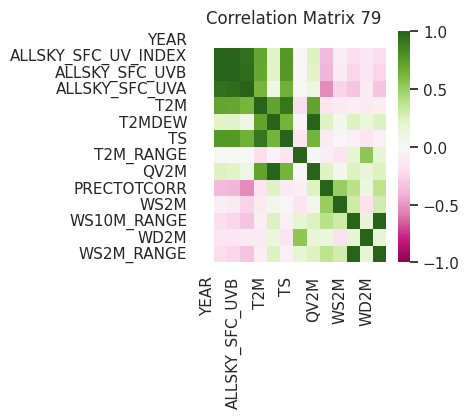

In [ ]:
# Convert the 'DOY' column to datetime
data['Date'] = pd.to_datetime(data['DOY'].astype(str), format='%j')
data.drop(['DOY'], axis=1, inplace=True)

# Set the date column as the index
data.set_index('Date', inplace=True)

# Define the rolling window size (2 months)
window_size_days = 2 * 30  # Assuming an average of 30 days in a month

# Calculate the total number of days for 13 years
total_days = len(data)

# Calculate the number of windows based on the window size
num_windows = total_days // window_size_days

# Create a list to store the correlation matrices
correlation_matrices = []

# Generate rolling windows and calculate cross-correlation matrices
for i in range(0, total_days - window_size_days + 1, window_size_days):
    window_data = data.iloc[i:i+window_size_days]
    correlation_matrix = window_data.corr()
    correlation_matrices.append(correlation_matrix)

# Plot or analyze the correlation matrices as needed
# For example, you can visualize them using seaborn's heatmap
for idx, matrix in enumerate(correlation_matrices):
    plt.figure(figsize=(3, 3))
    sns.heatmap(matrix, cmap="PiYG", vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix {idx+1}")
    plt.show()


Frame 1 to Frame 2 Distance: 0.17269654787930694
Frame 2 to Frame 3 Distance: 0.21350897526029192
Frame 3 to Frame 4 Distance: 0.23561481876620757
Frame 4 to Frame 5 Distance: 0.25825161488552795
Frame 5 to Frame 6 Distance: 0.2579135050886714
Frame 6 to Frame 7 Distance: 0.18092011953219816
Frame 7 to Frame 8 Distance: 0.20478983879495177
Frame 8 to Frame 9 Distance: 0.22838483944198076
Frame 9 to Frame 10 Distance: 0.30239082142823737
Frame 10 to Frame 11 Distance: 0.2568021452598674
Frame 11 to Frame 12 Distance: 0.24919352952737722
Frame 12 to Frame 13 Distance: 0.17965131174036
Frame 13 to Frame 14 Distance: 0.23625273960476623
Frame 14 to Frame 15 Distance: 0.1877838048305784
Frame 15 to Frame 16 Distance: 0.19556635176015721
Frame 16 to Frame 17 Distance: 0.32883420098370436
Frame 17 to Frame 18 Distance: 0.28538633854751355
Frame 18 to Frame 19 Distance: 0.16819485705080825
Frame 19 to Frame 20 Distance: 0.24823747317785252
Frame 20 to Frame 21 Distance: 0.18614089836143127
Fra

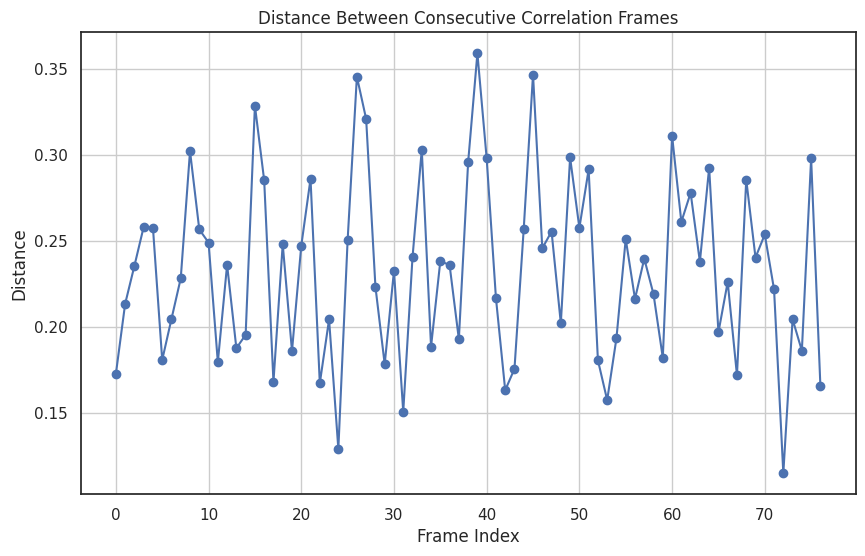

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read your data into a Pandas DataFrame (assuming you have it in a CSV file)
# Replace 'your_data.csv' with the actual file path
df = data

# Assuming your data has columns 'YEAR', 'DOY', and other parameters

# Convert 'YEAR' and 'DOY' columns to a datetime index
df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')
df.set_index('Date', inplace=True)

# Define the rolling window size (2 months, assuming 1 month = 30 days)
window_size = 2 * 30

# Create an empty list to store the correlation frames
correlation_frames = []
correlation_frames
# Calculate rolling cross-correlation matrices for each two-month window
for year in range(df['YEAR'].min(), df['YEAR'].max() + 1):
    for month in range(1, 13, 2):
        start_date = f"{year}-{month:02d}-01"
        end_date = pd.to_datetime(start_date) + pd.DateOffset(months=2)
        window = df[start_date:end_date]
        corr_matrix = window.corr()
        correlation_frames.append(corr_matrix)


# Calculate the distance between these frames
def frame_distance(frame1, frame2):
    return np.abs(frame1 - frame2).mean().mean()

frame_distances = []

for i in range(len(correlation_frames) - 1):
    dist = frame_distance(correlation_frames[i], correlation_frames[i + 1])
    frame_distances.append(dist)

# Display the frame distances
for i, dist in enumerate(frame_distances):
    print(f"Frame {i+1} to Frame {i+2} Distance: {dist}")

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(frame_distances, marker='o', linestyle='-', color='b')
plt.title('Distance Between Consecutive Correlation Frames')
plt.xlabel('Frame Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


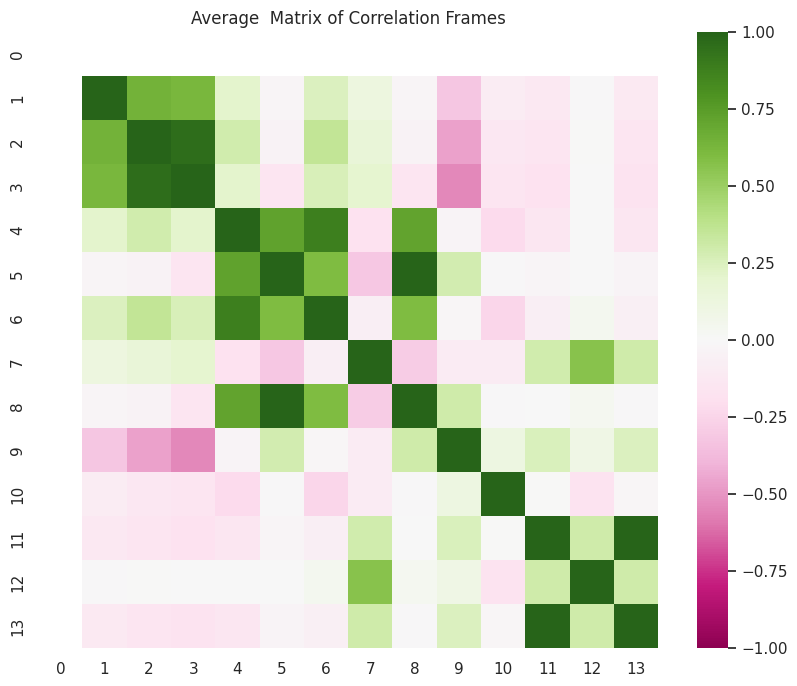

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Convert the 'DOY' column to datetime
data['Date'] = pd.to_datetime(data['DOY'].astype(str), format='%j')
data.drop(['DOY'], axis=1, inplace=True)

# Set the date column as the index
data.set_index('Date', inplace=True)

# Define the rolling window size (2 months)
window_size_days = 2 * 30  # Assuming an average of 30 days in a month

# Calculate the total number of days for 13 years
total_days = len(data)

# Create a list to store the correlation matrices
correlation_matrices = []

# Generate rolling windows and calculate cross-correlation matrices
for i in range(0, total_days - window_size_days + 1, window_size_days):
    window_data = data.iloc[i:i + window_size_days]
    correlation_matrix = window_data.corr()
    correlation_matrices.append(correlation_matrix)

# Create a single similarity matrix by averaging all correlation matrices
average_similarity_matrix = np.mean(correlation_matrices, axis=0)

# Plot the average similarity matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_similarity_matrix, cmap="PiYG", vmin=-1, vmax=1)
plt.title('Average  Matrix of Correlation Frames')
plt.show()
